In [1]:
#https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
!pip install scikit-learn==1.4.2

Defaulting to user installation because normal site-packages is not writeable


In [3]:
df = pd.read_csv("BankChurners.csv")

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
leakage_cols = [
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
]


In [6]:
df.drop(columns=leakage_cols, inplace=True)
df.drop(columns=["CLIENTNUM"], inplace=True)

In [7]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [8]:
df.shape

(10127, 20)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [10]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [11]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [12]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

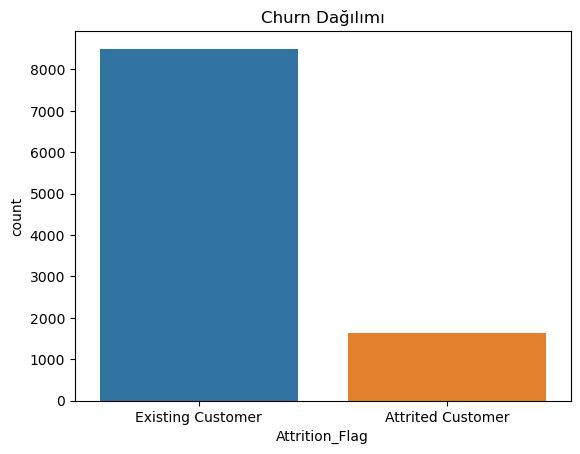

In [13]:
df["Attrition_Flag"].value_counts(normalize=True)

sns.countplot(x="Attrition_Flag", data=df)
plt.title("Churn Dağılımı")
plt.show()

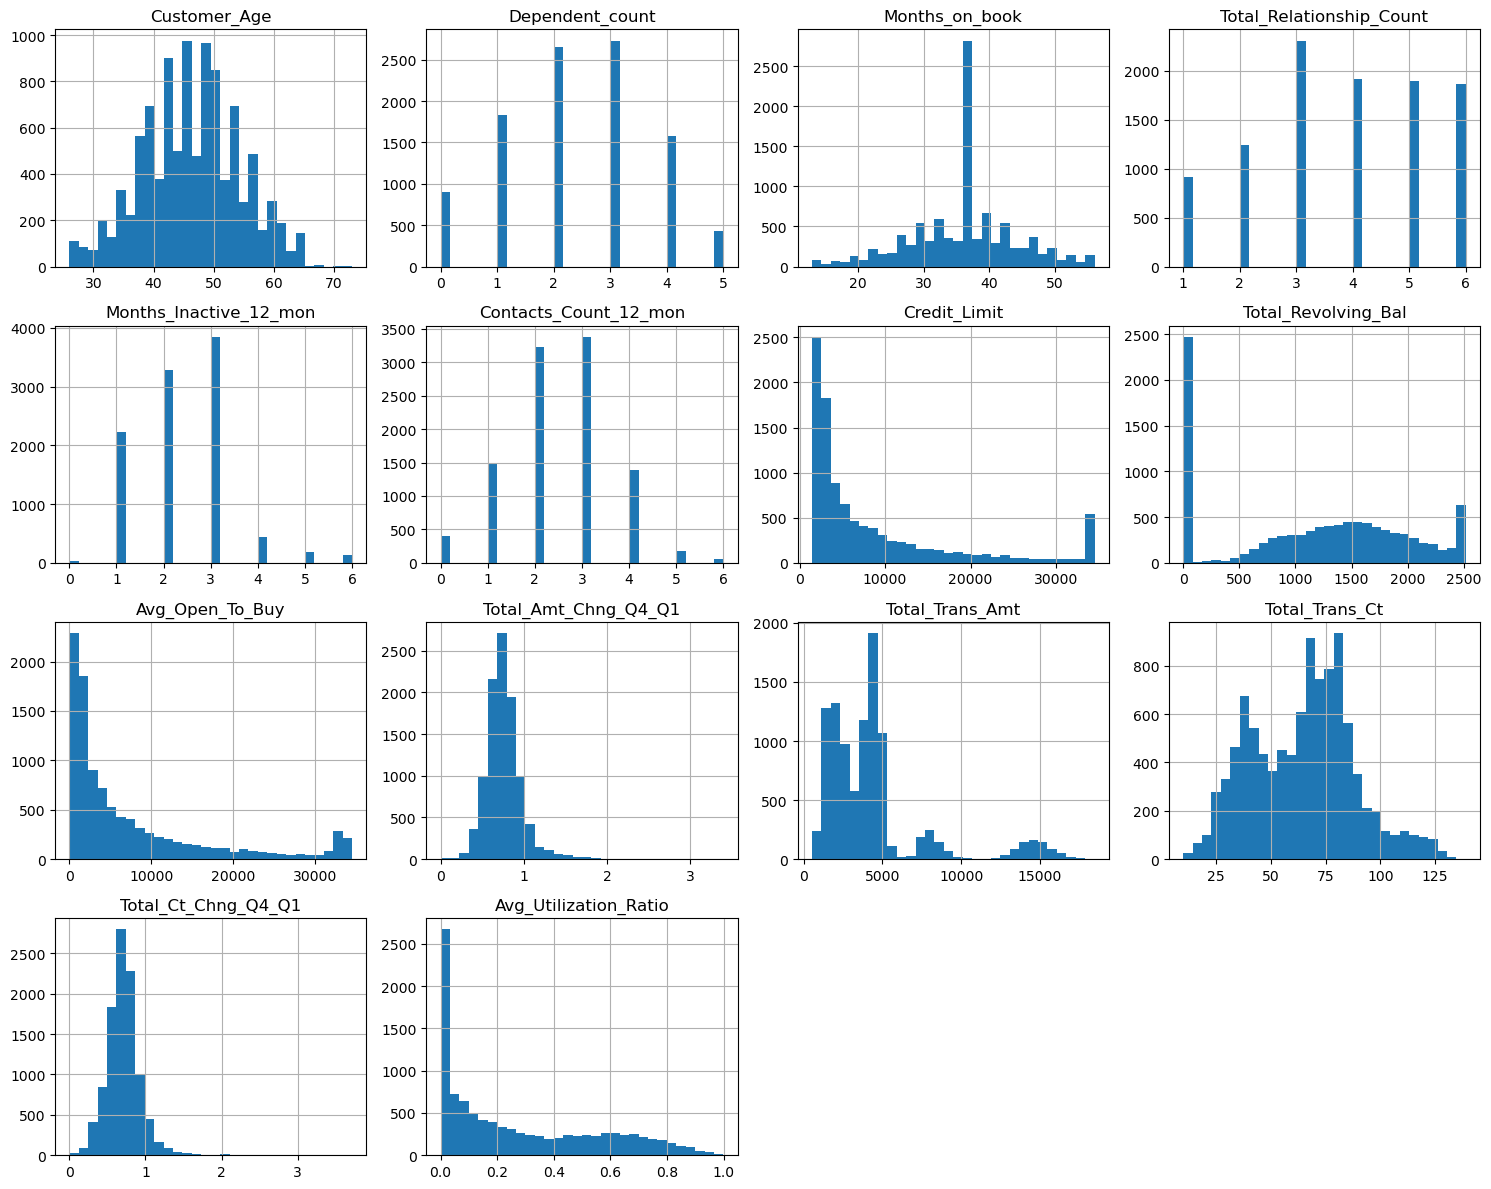

In [14]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns

df[num_cols].hist(figsize=(15,12), bins=30)
plt.tight_layout()
plt.show()

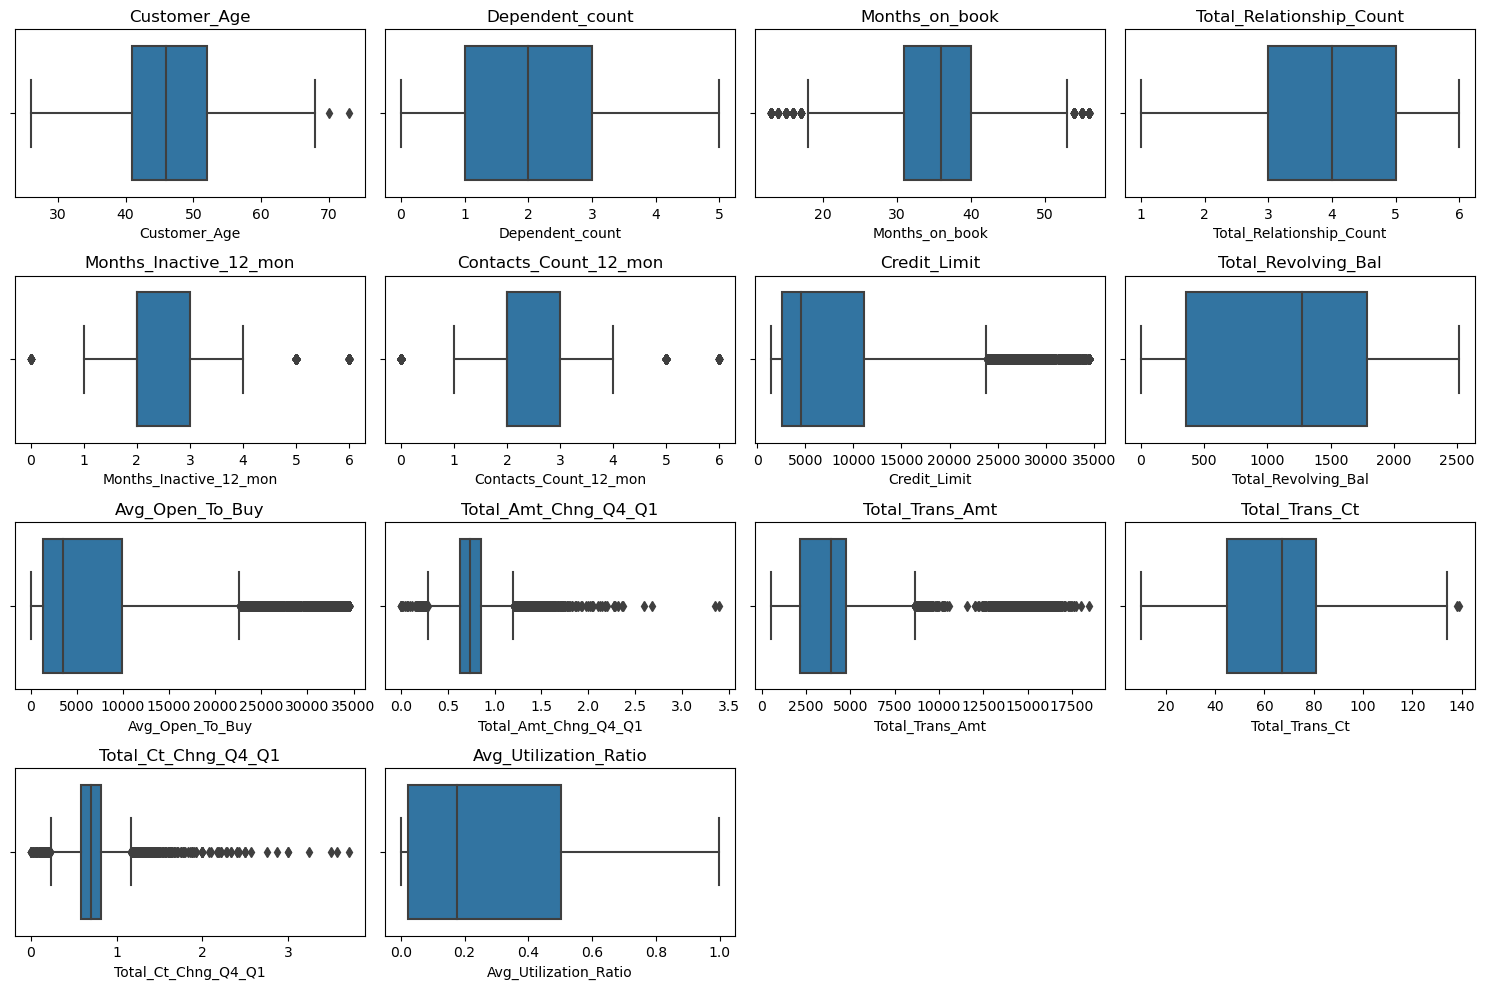

In [15]:
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

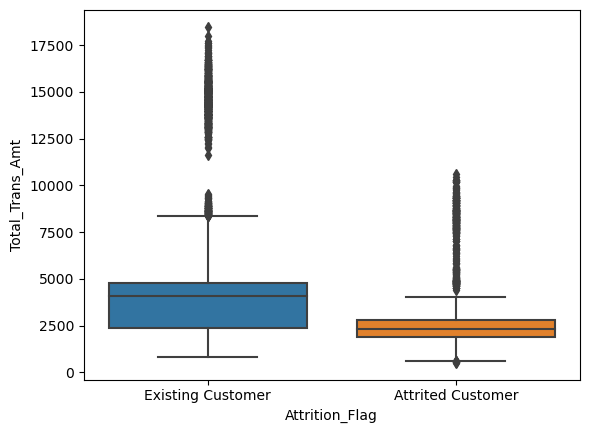

In [16]:
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Amt", data=df)
plt.show()

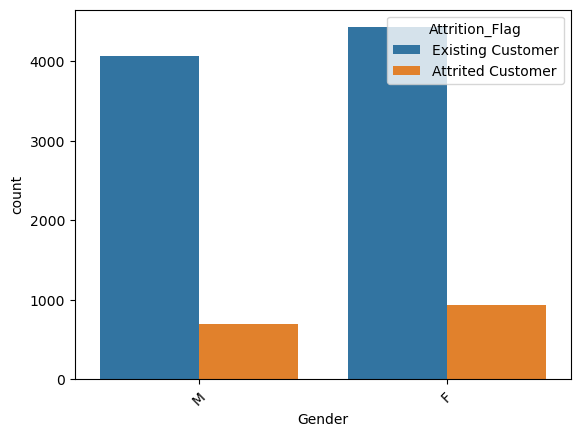

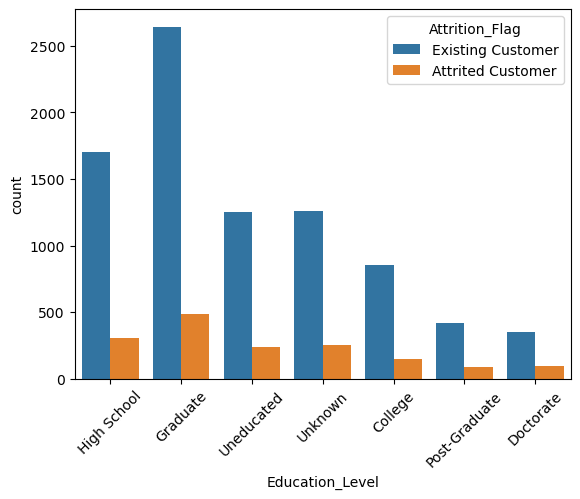

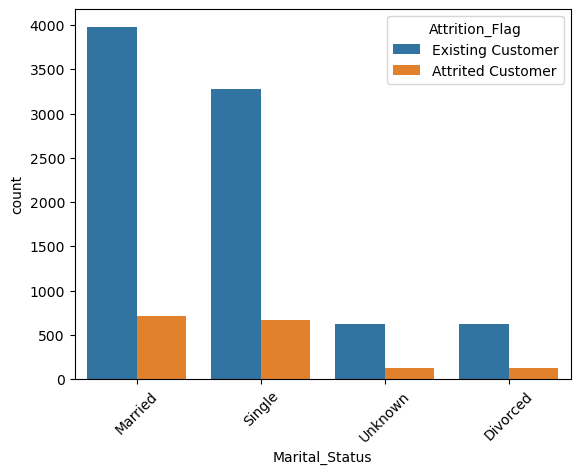

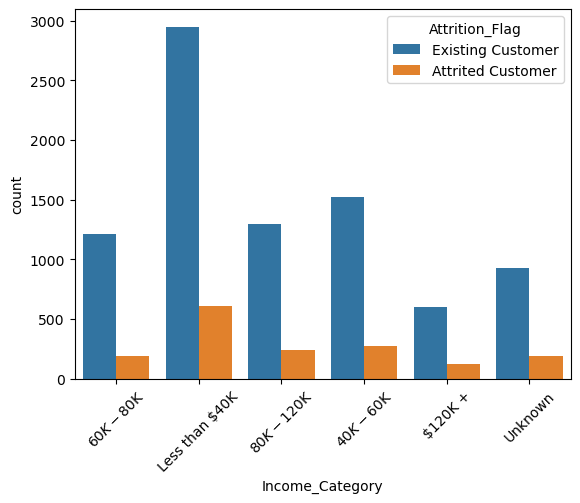

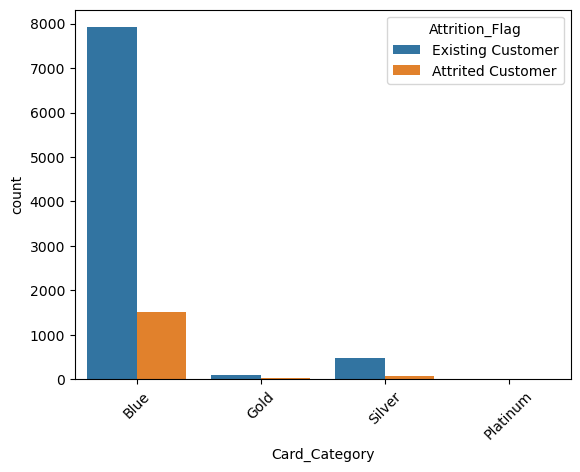

In [17]:
cat_cols = df.select_dtypes(include="object").columns.drop("Attrition_Flag")

for col in cat_cols:
    sns.countplot(x=col, hue="Attrition_Flag", data=df)
    plt.xticks(rotation=45)
    plt.show()

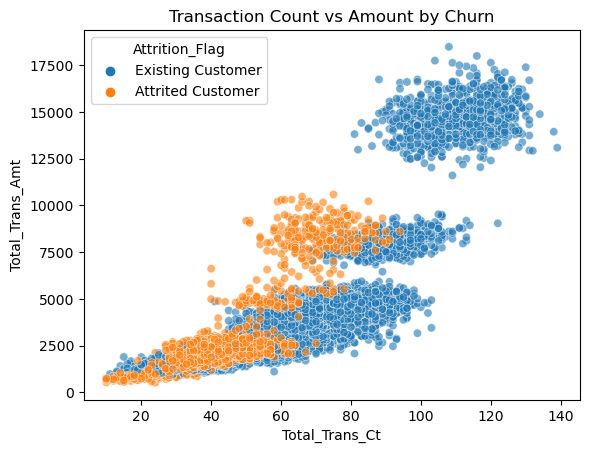

In [18]:
sns.scatterplot(
    x="Total_Trans_Ct",
    y="Total_Trans_Amt",
    hue="Attrition_Flag",
    alpha=0.6,
    data=df
)
plt.title("Transaction Count vs Amount by Churn")
plt.show()

In [19]:
df["Churn"] = df["Attrition_Flag"].map({
    "Existing Customer": 0,
    "Attrited Customer": 1
})

df.drop(columns=["Attrition_Flag"], inplace=True)

In [20]:
education_map = {
    "Uneducated": 0,
    "High School": 1,
    "College": 2,
    "Graduate": 3,
    "Post-Graduate": 4,
    "Doctorate": 5
}

income_map = {
    "Less than $40K": 0,
    "$40K - $60K": 1,
    "$60K - $80K": 2,
    "$80K - $120K": 3,
    "$120K +": 4
}

df["Education_Level"] = df["Education_Level"].map(education_map)
df["Income_Category"] = df["Income_Category"].map(income_map)

In [21]:
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Marital_Status", "Card_Category"],
    drop_first=True
)

In [22]:
df = df_encoded.copy()

In [23]:
bool_cols = df.select_dtypes(include="bool").columns
df[bool_cols] = df[bool_cols].astype(int)

In [24]:
df["Education_Level"].fillna(2, inplace=True)
df["Income_Category"].fillna(2, inplace=True)

In [25]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [27]:
print("Train churn oranı:")
print(y_train.value_counts(normalize=True))

print("\nTest churn oranı:")
print(y_test.value_counts(normalize=True))

Train churn oranı:
Churn
0    0.839279
1    0.160721
Name: proportion, dtype: float64

Test churn oranı:
Churn
0    0.839585
1    0.160415
Name: proportion, dtype: float64


In [28]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
models = {
    "Logistic": LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=10),
    "Decision Tree": DecisionTreeClassifier(class_weight="balanced", random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    results.append((name, auc))

for r in results:
    print(r)


('Logistic', 0.9190847013069235)
('KNN', 0.9313797313797315)
('Decision Tree', 0.8595115995115996)
('Random Forest', 0.9863519196852529)
('Gradient Boosting', 0.987943743499299)


In [30]:
gb = GradientBoostingClassifier(random_state=42)

param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [2, 3, 4],
    "subsample": [0.8, 1.0]
}

In [31]:
grid = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train_scaled, y_train)

print("Best Params:", grid.best_params_)
print("Best CV ROC-AUC:", grid.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Params: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 300, 'subsample': 1.0}
Best CV ROC-AUC: 0.9936190044505775


In [32]:
best_gb = grid.best_estimator_

y_pred = best_gb.predict(X_test_scaled)
y_prob = best_gb.predict_proba(X_test_scaled)[:, 1]

print("Test ROC-AUC:", roc_auc_score(y_test, y_prob))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test ROC-AUC: 0.990832541943653
[[1688   13]
 [  50  275]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.95      0.85      0.90       325

    accuracy                           0.97      2026
   macro avg       0.96      0.92      0.94      2026
weighted avg       0.97      0.97      0.97      2026



In [33]:
train_auc = roc_auc_score(y_train, best_gb.predict_proba(X_train_scaled)[:, 1])
test_auc = roc_auc_score(y_test, y_prob)

print("Train ROC-AUC:", train_auc)
print("Test ROC-AUC:", test_auc)
print("Gap:", train_auc - test_auc)

Train ROC-AUC: 0.9988386066533232
Test ROC-AUC: 0.990832541943653
Gap: 0.008006064709670246


In [34]:
import pickle

model_package = {
    "model": best_gb,
    "scaler": scaler,
    "feature_names": X_train.columns.tolist()
}

with open("churn_gradient_boosting_model.pkl", "wb") as f:
    pickle.dump(model_package, f)

print("Yeni pickle (sklearn 1.4.2) oluşturuldu.")


Yeni pickle (sklearn 1.4.2) oluşturuldu.


In [35]:
with open("churn_gradient_boosting_model.pkl", "rb") as f:
    data = pickle.load(f)

model = data["model"]
scaler = data["scaler"]
feature_names = data["feature_names"]


In [36]:
pd.DataFrame(X_test_scaled).to_csv("30_testdatascaled.csv", index=False)

In [37]:
import sklearn
print(sklearn.__version__)

1.4.2
